In [ ]:
# imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import combinations
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# Import the data

In [ ]:
# world bank dataset
world_bank = pd.read_csv("../additional_material/world_bank_development_indicators.csv")

# income dataset
income_data = pd.ExcelFile("../additional_material/income.xlsx")

In [ ]:
 income_data.sheet_names

['List of economies', 'composition', 'notes']

In [ ]:
# only reading first sheet in excel file
economy_income = pd.read_excel(income_data, sheet_name='List of economies')
economy_income

,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,"Middle East, North Africa, Afghanistan & Pakistan",Upper middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,High income,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN
...,...,...,...,...,...
262,Sub-Saharan Africa,SSF,NaN,NaN,NaN
263,Sub-Saharan Africa (excluding high income),SSA,NaN,NaN,NaN
264,Sub-Saharan Africa (IDA & IBRD),TSS,NaN,NaN,NaN
265,Upper middle income,UMC,NaN,NaN,NaN


In [ ]:
economy_income["Economy"] = economy_income["Economy"].replace("Türkiye", "Turkiye")
world_bank["country"].unique()
world_bank = world_bank[world_bank["country"] != "Turkey"] # delete turkey columns (old name of the country, full of na's)

In [ ]:
# Add income/region information by merging the tables into a single dataframe.

world_bank = world_bank.merge(economy_income[['Economy', 'Income group', 'Region']],
                       how='left',
                       left_on='country',
                       right_on='Economy').drop(columns=['Economy'])

In [ ]:
world_bank.sample(10)

,country,date,agricultural_land,forest_land,land_area,avg_precipitation,trade_in_services,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity,...,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,income_group,region,Income group,Region
5050,Guinea,2018-01-01,59.506756,25.512779,245720.0,1651.0,7.582337,-1.059754,0.133759,45.0,...,59.349000,12554864.0,8017536.0,-0.768330,0.130911,NaN,Lower middle income,Sub-Saharan Africa,Lower middle income,Sub-Saharan Africa
13107,West Bank and Gaza,1980-01-01,82.059801,NaN,6020.0,402.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Lower middle income,"Middle East, North Africa, Afghanistan & Pakistan",Lower middle income,"Middle East, North Africa, Afghanistan & Pakistan"
12316,Turkmenistan,1988-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.682000,3525110.0,1927636.0,NaN,NaN,NaN,Upper middle income,Europe & Central Asia,Upper middle income,Europe & Central Asia
8099,Moldova,1995-01-01,77.619192,10.170058,32930.0,450.0,19.442892,NaN,NaN,100.0,...,65.099000,2953200.0,1586046.0,NaN,NaN,9.010965,Upper middle income,Europe & Central Asia,Upper middle income,Europe & Central Asia
3361,Djibouti,1993-01-01,60.461605,0.241588,23180.0,220.0,55.874562,NaN,NaN,NaN,...,55.774000,611231.0,145430.0,NaN,NaN,NaN,Lower middle income,"Middle East, North Africa, Afghanistan & Pakistan",Lower middle income,"Middle East, North Africa, Afghanistan & Pakistan"
2457,Chad,1985-01-01,38.242535,NaN,1259200.0,322.0,18.049213,NaN,NaN,NaN,...,45.050000,4967590.0,3985050.0,NaN,NaN,NaN,Low income,Sub-Saharan Africa,Low income,Sub-Saharan Africa
10513,Seychelles,1977-01-01,10.869565,NaN,460.0,2330.0,108.414432,NaN,NaN,NaN,...,NaN,61786.0,31337.0,NaN,NaN,NaN,High income,Sub-Saharan Africa,High income,Sub-Saharan Africa
6691,Kyrgyz Republic,1995-01-01,54.937435,6.040987,191800.0,533.0,14.103696,NaN,NaN,NaN,...,65.790244,4560400.0,2902740.0,NaN,NaN,11.716793,Lower middle income,Europe & Central Asia,Lower middle income,Europe & Central Asia
9421,Palau,1973-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12541.0,4945.0,NaN,NaN,NaN,High income,East Asia & Pacific,High income,East Asia & Pacific
11178,Sri Lanka,2002-01-01,37.569766,34.346356,62710.0,1712.0,17.250288,-0.216593,0.195582,80.7,...,71.117000,19110707.0,15604083.0,-0.088549,0.164575,NaN,Lower middle income,South Asia,Lower middle income,South Asia


In [ ]:
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17241 entries, 0 to 17240
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17241 non-null  object 
 1   date                                       17241 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

In [ ]:
# dataset column name notaions struture
world_bank.columns = (
    world_bank.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)
world_bank.head()

,country,date,agricultural_land,forest_land,land_area,avg_precipitation,trade_in_services,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity,...,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,income_group,region
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"


In [ ]:
# Clean up countries

In [ ]:
world_bank['country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica'

In [ ]:
world_bank.columns

Index(['country', 'date', 'agricultural_land', 'forest_land', 'land_area',
       'avg_precipitation', 'trade_in_services',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity', 'renewvable_energy_consumption',
       'electric_power_consumption', 'co2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual',
       'real_interest_rate', 'risk_premium_on_lending',
       'research_and_development_expenditure', 'central_goverment_debt',
       'tax_revenue', 'expense', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet', 'logistic_performance_index',
       'military_expenditure', 'gdp_current_us',
       'political_stability_estimate', 'political_stability_std',
       'rule_of_law_estimate', 'rule_of_law_std',
       'regulatory_qual

In [ ]:
# removing empty rows from income_grop
world_bank = world_bank.dropna(subset=['income_group'])
world_bank.shape

(13407, 52)

In [ ]:
# unique values in life life_expectancy_at_birth
world_bank['life_expectancy_at_birth'].unique()

array([32.535, 33.068, 33.547, ..., 61.414, 61.124, 59.253])

In [ ]:
# checking null values
world_bank['life_expectancy_at_birth'].isnull().sum()

np.int64(1006)

In [ ]:
# droping nan values from life_expectancy_at_birth
#world_bank = world_bank.dropna(subset=['life_expectancy_at_birth'])
world_bank.shape

(12337, 52)

In [ ]:
# checking duplicates
world_bank.duplicated().sum()

np.int64(0)

In [ ]:
# Some basic initial inspections

In [ ]:
# display the first, the last and a random sample of 7 entries
world_bank.head(1), world_bank.tail(1), world_bank.sample(7)

(       country        date  agricultural_land  forest_land  land_area  \
 0  Afghanistan  1960-01-01                NaN          NaN        NaN   
 
    avg_precipitation  trade_in_services  control_of_corruption_estimate  \
 0                NaN                NaN                             NaN   
 
    control_of_corruption_std  access_to_electricity  ...  birth_rate  \
 0                        NaN                    NaN  ...       50.34   
 
    death_rate  life_expectancy_at_birth  population  rural_population  \
 0      31.921                    32.535   8622466.0         7898093.0   
 
    voice_and_accountability_estimate  voice_and_accountability_std  \
 0                                NaN                           NaN   
 
    intentional_homicides  income_group  \
 0                    NaN    Low income   
 
                                               region  
 0  Middle East, North Africa, Afghanistan & Pakistan  
 
 [1 rows x 52 columns],
         country        date

In [ ]:
# check data types
world_bank.dtypes

country                                      object
date                                         object
agricultural_land                           float64
forest_land                                 float64
land_area                                   float64
avg_precipitation                           float64
trade_in_services                           float64
control_of_corruption_estimate              float64
control_of_corruption_std                   float64
access_to_electricity                       float64
renewvable_energy_consumption               float64
electric_power_consumption                  float64
co2_emisions                                float64
other_greenhouse_emisions                   float64
population_density                          float64
inflation_annual                            float64
real_interest_rate                          float64
risk_premium_on_lending                     float64
research_and_development_expenditure        float64
central_gove

In [ ]:
# check missing values
world_bank.isna().sum()

country                                         0
date                                            0
agricultural_land                            1465
forest_land                                  6166
land_area                                    1321
avg_precipitation                            2750
trade_in_services                            5668
control_of_corruption_estimate               8034
control_of_corruption_std                    8034
access_to_electricity                        6661
renewvable_energy_consumption                6190
electric_power_consumption                   6709
co2_emisions                                 6696
other_greenhouse_emisions                    6696
population_density                           1321
inflation_annual                             4244
real_interest_rate                           8164
risk_premium_on_lending                     10056
research_and_development_expenditure        10158
central_goverment_debt                      10571


In [ ]:
# checking duplicates values
world_bank.duplicated().sum()

np.int64(0)

In [ ]:
# basic summary statistics for both categorical
#getting statistics on categorical/object columns
obj_cols = world_bank.select_dtypes(include='object').columns
print(f"This dataset has {len(obj_cols)} object columns:", list(obj_cols))

This dataset has 4 object columns: ['country', 'date', 'income_group', 'region']


In [ ]:
#detailed statistics on object data
for col in world_bank.select_dtypes(include='object'):
    print(f"\nColumn: {col}")
    print("Count of non-null values:", world_bank[col].count())
    print("Number of unique values:", world_bank[col].nunique())
    print("Most frequent value:", world_bank[col].value_counts().idxmax())
    print("Most frequent value (frequency):", world_bank[col].value_counts().max())
    print("Least frequent value:", world_bank[col].value_counts().idxmin())
    print("Least frequent value (frequency):", world_bank[col].value_counts().min())


Column: country
Count of non-null values: 12337
Number of unique values: 203
Most frequent value: Afghanistan
Most frequent value (frequency): 62
Least frequent value: Cayman Islands
Least frequent value (frequency): 1

Column: date
Count of non-null values: 12337
Number of unique values: 62
Most frequent value: 1995-01-01
Most frequent value (frequency): 202
Least frequent value: 1965-01-01
Least frequent value (frequency): 195

Column: income_group
Count of non-null values: 12337
Number of unique values: 4
Most frequent value: High income
Most frequent value (frequency): 4679
Least frequent value: Low income
Least frequent value (frequency): 1488

Column: region
Count of non-null values: 12337
Number of unique values: 7
Most frequent value: Europe & Central Asia
Most frequent value (frequency): 3272
Least frequent value: North America
Least frequent value (frequency): 186


In [ ]:
# numerical variables
world_bank.describe()

,agricultural_land,forest_land,land_area,avg_precipitation,trade_in_services,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity,renewvable_energy_consumption,electric_power_consumption,...,multidimensional_poverty_headcount_ratio,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,10872.000000,6171.000000,1.101600e+04,9587.000000,6669.000000,4303.000000,4303.000000,5676.000000,6147.000000,5628.000000,...,433.000000,2032.000000,12315.000000,12320.000000,12337.000000,1.233700e+04,1.221300e+04,4338.000000,4338.000000,3761.000000
mean,36.859765,32.024224,6.333164e+05,1197.780640,23.638020,-0.022664,0.199437,80.971078,30.652775,3253.943467,...,26.855810,37.704429,27.899943,10.359263,64.841867,2.575121e+07,1.405247e+07,-0.024143,0.164513,7.858061
std,22.429526,24.656054,1.700936e+06,801.397558,25.049107,1.002276,0.080858,29.641385,30.384863,4510.362635,...,10.706123,8.897723,13.043383,5.546529,11.264059,1.077548e+08,7.130716e+07,0.991458,0.059423,12.187223
min,0.262821,0.000000,1.000000e+01,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,...,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.103012,0.000000
25%,17.769203,10.882353,1.487000e+04,589.000000,9.821090,-0.799936,0.147376,70.463633,3.725000,442.235588,...,18.500000,31.100000,16.000000,6.800000,57.947000,6.636530e+05,2.973540e+05,-0.828785,0.126784,1.273807
50%,37.647385,30.270000,1.074000e+05,1083.000000,16.197962,-0.257588,0.172068,99.093647,19.780000,1637.804168,...,24.800000,35.500000,26.467000,9.070500,67.661780,4.440300e+06,1.973563e+06,0.008879,0.142200,3.056778
75%,54.710446,50.851685,4.727100e+05,1732.000000,27.779357,0.666760,0.221240,100.000000,53.015000,4399.794384,...,32.600000,43.000000,39.642000,12.243000,73.080000,1.348335e+07,7.284867e+06,0.855610,0.189655,9.010965
max,93.440750,98.574551,1.638995e+07,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,54799.174708,...,74.200000,65.800000,58.121000,103.534000,85.497561,1.412360e+09,9.093848e+08,1.800992,0.578548,138.773986


In [ ]:
# correlation
world_bank.corr(numeric_only=True)

,agricultural_land,forest_land,land_area,avg_precipitation,trade_in_services,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity,renewvable_energy_consumption,electric_power_consumption,...,multidimensional_poverty_headcount_ratio,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
agricultural_land,1.000000,-0.458758,0.001600,-0.297814,-0.187452,-0.209995,-0.216473,-0.133978,0.080677,-0.263808,...,0.220813,-0.079463,-0.030196,0.119528,-0.046757,0.114777,0.110529,-0.133629,-0.196474,0.004053
forest_land,-0.458758,1.000000,-0.002582,0.659278,-0.035680,0.028293,0.075231,-0.080257,0.223300,-0.084089,...,0.027267,0.290046,0.022660,0.089553,-0.068246,-0.037719,-0.051540,0.173784,0.078603,0.213048
land_area,0.001600,-0.002582,1.000000,-0.171256,-0.215777,-0.020428,-0.165377,0.048991,-0.045525,0.123749,...,0.093548,0.116132,-0.061581,0.003962,0.020022,0.487176,0.399269,-0.049622,-0.118469,0.055874
avg_precipitation,-0.297814,0.659278,-0.171256,1.000000,0.099198,0.005827,0.196425,-0.089262,0.264676,-0.131218,...,-0.016288,0.455183,0.042636,-0.064898,-0.028366,-0.047990,-0.034405,0.153404,0.167353,0.293777
trade_in_services,-0.187452,-0.035680,-0.215777,0.099198,1.000000,0.310761,0.245798,0.190644,-0.269485,0.181370,...,-0.183899,-0.201748,-0.199778,-0.168794,0.238526,-0.154641,-0.130459,0.276768,0.271775,-0.081243
control_of_corruption_estimate,-0.209995,0.028293,-0.020428,0.005827,0.310761,1.000000,0.082057,0.476000,-0.371562,0.655920,...,-0.687146,-0.382237,-0.597499,-0.120580,0.634413,-0.062522,-0.094646,0.768894,0.217395,-0.210301
control_of_corruption_std,-0.216473,0.075231,-0.165377,0.196425,0.245798,0.082057,1.000000,-0.055077,-0.063791,-0.047255,...,-0.002941,0.160347,0.154964,-0.040442,-0.149225,-0.148568,-0.119533,0.080121,0.787512,0.131347
access_to_electricity,-0.133978,-0.080257,0.048991,-0.089262,0.190644,0.476000,-0.055077,1.000000,-0.782931,0.414108,...,-0.413151,-0.326280,-0.829276,-0.408610,0.832060,0.021407,-0.027474,0.395380,0.084363,-0.073030
renewvable_energy_consumption,0.080677,0.223300,-0.045525,0.264676,-0.269485,-0.371562,-0.063791,-0.782931,1.000000,-0.264196,...,0.066159,0.315903,0.669641,0.438080,-0.676926,0.003455,0.045177,-0.280414,-0.184734,0.074574
electric_power_consumption,-0.263808,-0.084089,0.123749,-0.131218,0.181370,0.655920,-0.047255,0.414108,-0.264196,1.000000,...,-0.488156,-0.440925,-0.494273,-0.212395,0.547881,-0.063650,-0.101133,0.435134,0.111487,-0.250662


In [ ]:
# chi square finding relations in object columns
# categorical_cols = ['country', 'date', 'income_group', 'region']


def chi_test(world_bank, col1, col2):
    table = pd.crosstab(world_bank[col1], world_bank[col2])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{col1}  vs  {col2}  →  p-value = {p}")


# run chi-square for every pair => used obj_cols from basic summary statistics for both categorical above code
for col1, col2 in combinations(obj_cols, 2):
    chi_test(world_bank, col1, col2)

country  vs  date  →  p-value = 1.0
country  vs  income_group  →  p-value = 0.0
country  vs  region  →  p-value = 0.0
date  vs  income_group  →  p-value = 1.0
date  vs  region  →  p-value = 1.0
income_group  vs  region  →  p-value = 0.0


In [ ]:
# basic plots for categorical and numerical variables to check distributions and counts (histogram, barplot)

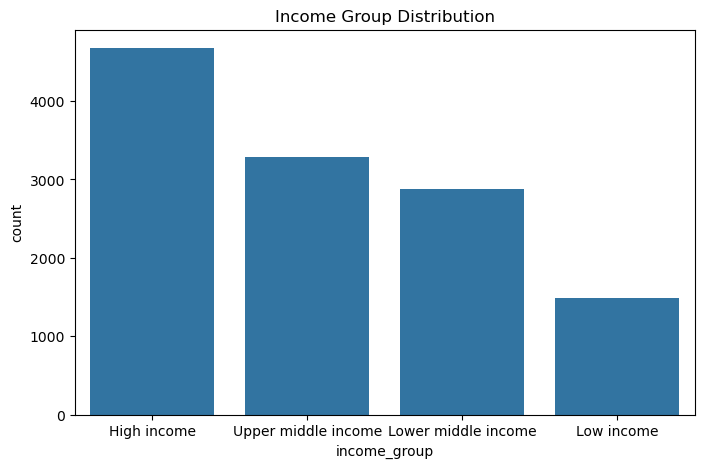

In [ ]:
# checking how many times each income_group appears.
plt.figure(figsize=(8,5))
sns.countplot(data=world_bank, x='income_group', order=world_bank['income_group'].value_counts().index)
plt.title("Income Group Distribution")
plt.show()

**Subsetting**

In [ ]:
df_90_19 = world_bank[(world_bank["date"] <= "2019-01-01") & (world_bank["date"] >= "1990-01-01") ]
df = df_90_19[["country","date","agricultural_land","access_to_electricity","renewvable_energy_consumption","co2_emisions", "other_greenhouse_emisions", "population_density", "inflation_annual",
             "individuals_using_internet", "gdp_current_us", "birth_rate","death_rate","life_expectancy_at_birth", "population", "rural_population","income_group", "region"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6300 entries, 30 to 17236
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        6300 non-null   object 
 1   date                           6300 non-null   object 
 2   agricultural_land              5965 non-null   float64
 3   access_to_electricity          5475 non-null   float64
 4   renewvable_energy_consumption  6065 non-null   float64
 5   co2_emisions                   5549 non-null   float64
 6   other_greenhouse_emisions      5549 non-null   float64
 7   population_density             6073 non-null   float64
 8   inflation_annual               4972 non-null   float64
 9   individuals_using_internet     5747 non-null   float64
 10  gdp_current_us                 5846 non-null   float64
 11  birth_rate                     6168 non-null   float64
 12  death_rate                     6153 non-null   floa

In [ ]:
df["income_group"].unique()

array(['Low income', 'Upper middle income', 'High income',
       'Lower middle income'], dtype=object)

In [ ]:
df["region"].unique()

array(['Middle East, North Africa, Afghanistan & Pakistan',
       'Europe & Central Asia', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'South Asia',
       'North America'], dtype=object)

In [ ]:
ordered_income = [
    "Low income",
    "Lower middle income",
    "Upper middle income",
    "High income"
]

income_group_ordered = pd.CategoricalDtype(
    categories=ordered_income,
    ordered=True
)

df["income_group"] = df["income_group"].astype(income_group_ordered)

/tmp/ipython-input-2894180460.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income_group"] = df["income_group"].astype(income_group_ordered)


In [ ]:
df.to_csv ("week_05_group_4_cleaned_data.csv", index=False, encoding='utf-8')
files.download("week_05_group_4_cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Birth rate vs. Income Group**

In [ ]:
df = pd.read_csv("../additional_material/week_05_group_4_cleaned_data.csv")

In [ ]:
df_br = df.dropna(subset=['birth_rate', 'income_group'])

/tmp/ipython-input-2430404410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br["log_birth_rate"] = np.log(df_br["birth_rate"]+1)


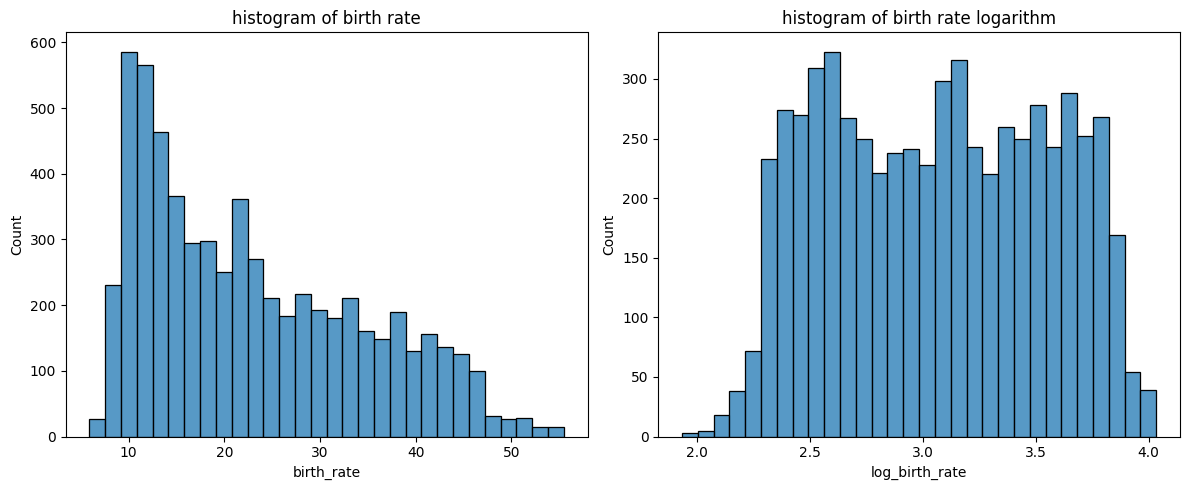

In [ ]:
df_br["log_birth_rate"] = np.log(df_br["birth_rate"]+1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x="birth_rate", data=df_br, bins=30, ax=axes[0])
axes[0].set_title('histogram of birth rate')

sns.histplot(x="log_birth_rate", data=df_br, bins=30, ax=axes[1])
axes[1].set_title('histogram of birth rate logarithm')

plt.tight_layout()
plt.show()


*   The bimodal distribution observed after the log transformation is most likely a result of the distinct, separate characteristics of your different income groups, where each group clusters around its own average birth rate.




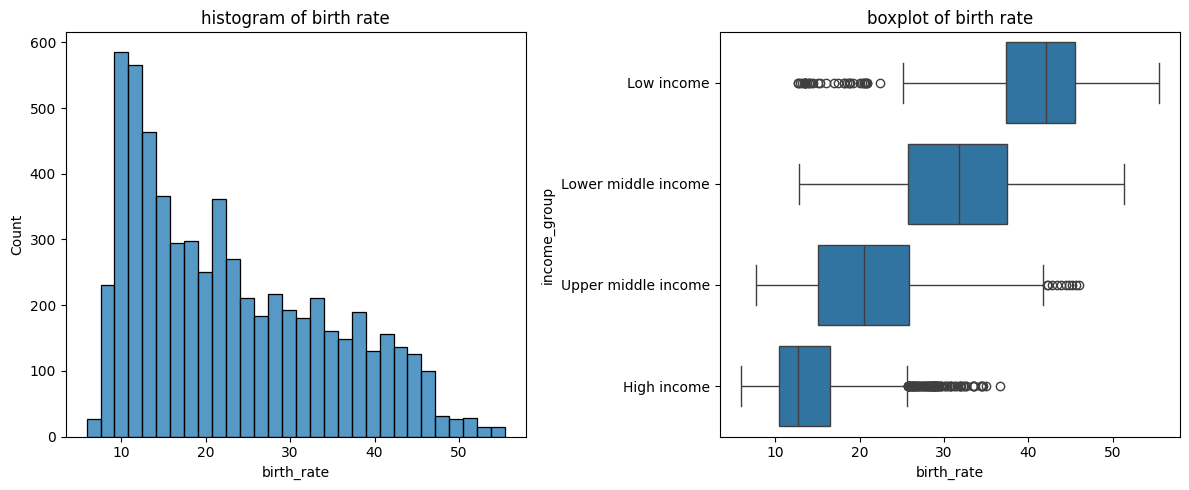

In [ ]:
#checking normal distribution and boxplot of co2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x="birth_rate", data=df_br, bins=30, ax=axes[0])
axes[0].set_title('histogram of birth rate')

sns.boxplot(y="income_group", x="birth_rate", data=df_br, ax=axes[1])
axes[1].set_title('boxplot of birth rate')

plt.tight_layout()
plt.show()

In [ ]:
formula = "log_birth_rate ~ C(income_group)" #it is recommended to put the formula in a variable called "formula"
model = ols(formula, data=df_br).fit()

In [ ]:
aov_table = anova_lm(model, typ=2) #use tpy=2 for no interactions
aov_table

,sum_sq,df,F,PR(>F)
C(income_group),886.614988,3.0,3281.471483,0.0
Residual,555.146760,6164.0,NaN,NaN


Null Hypothesis:  

$$H_0: \mu_{\text{High}} = \mu_{\text{Low}} = \mu_{\text{Lower Middle}} = \mu_{\text{Upper Middle}}$$

Which implies: There is no statistically significant difference in the mean of the dependent variable across the four income groups (High income, Low income, Lower middle income, and Upper middle income).

The ANOVA test shows a highly significant difference in the mean of the dependent variable across the income groups, with an extremely large F-statistic of 3281.47 and a P-value of $0.0$ (rejecting the null hypothesis).

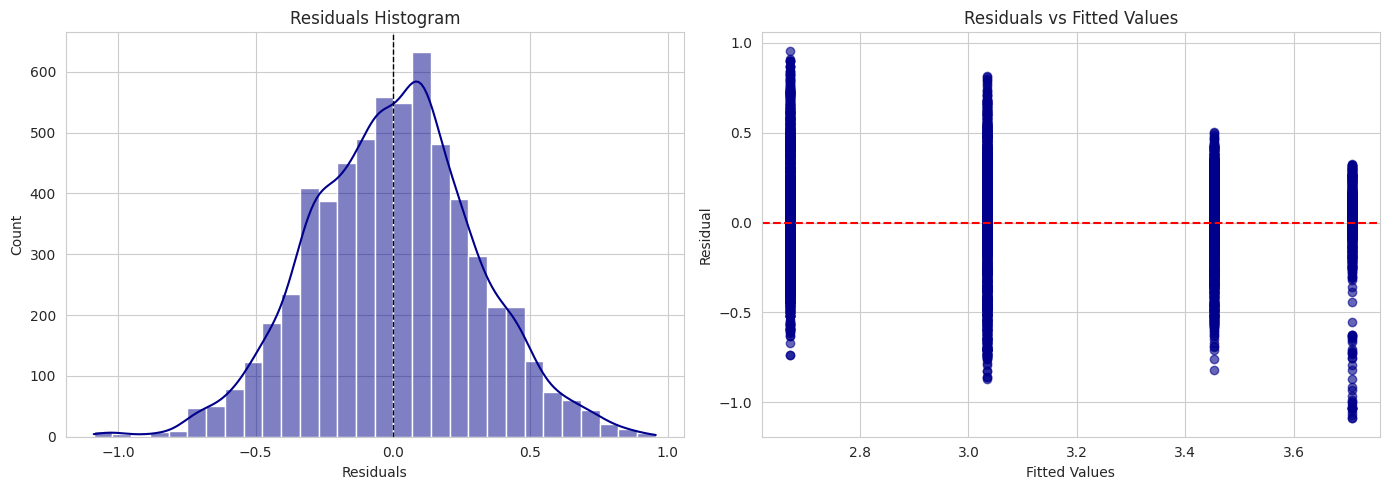

In [ ]:
residuals = model.resid  #getting the residuals of the anova model

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.set_style("whitegrid")

# Residuals histogram
sns.histplot(model.resid, bins=30, kde=True, color='darkblue', ax=axes[0])
axes[0].set_title('Residuals Histogram')
axes[0].set_xlabel('Residuals')
axes[0].axvline(model.resid.mean(), color='black', linestyle='dashed', linewidth=1)

# Residuals vs. fitted values
axes[1].scatter(model.fittedvalues, model.resid, alpha=0.6, color='darkblue')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[1].set_xlabel("Fitted Values")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs Fitted Values")

plt.tight_layout()
plt.show()

* The plot of residuals against fitted values reveals four distinct vertical clusters, as expected for a model with a categorical predictor. However, the variance of the residuals appears non-constant across these clusters, suggesting a violation of the homoskedasticity assumption. This non-random pattern indicates that the model's standard errors and the validity of inference may be compromised, despite the residuals reportedly being normally distributed.

In [ ]:
# Extracting the sum of squares values for the model and residuals
SS_model = aov_table['sum_sq'].iloc[:-1].sum()
SS_residual = aov_table['sum_sq'].iloc[-1]
# Total sum of squares
SS_total = SS_model + SS_residual

# Explained variance
explained_variance = SS_model / SS_total
print(f'Explained Variance: {explained_variance:.3f}')

Explained Variance: 0.615


* Based on the **ANOVA** results, the income groups account for $61.5\%$ of the total variance in the dependent variable ($R^2 = 0.615$), which, combined with the significant F-statistic (3281.47) and $P$-value ($0.0$), confirms that the groups are a powerful and statistically significant predictor in the model.

In [ ]:
tukey = pairwise_tukeyhsd(endog=df_br['log_birth_rate'], groups=df_br['income_group'], alpha=0.05)
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------------------
        High income          Low income   1.0368   0.0  1.0041  1.0695   True
        High income Lower middle income    0.782   0.0  0.7561  0.8078   True
        High income Upper middle income   0.3632   0.0  0.3384  0.3879   True
         Low income Lower middle income  -0.2548   0.0 -0.2901 -0.2195   True
         Low income Upper middle income  -0.6736   0.0 -0.7082 -0.6391   True
Lower middle income Upper middle income  -0.4188   0.0 -0.4469 -0.3907   True
-----------------------------------------------------------------------------


* **The Tukey HSD test** confirmed that the mean difference in $\mathbf{\text{Log}(\text{Birth Rate})}$ between every possible pair of income groups is statistically significant ($\mathbf{p < 0.05}$ for all pairs). This finding provides definitive quantitative support for the Demographic Transition Model, proving that each stage of economic development (income group) is associated with a unique and distinct average birth rate. The largest statistical difference was found between the two extremes, with Low income countries exhibiting a significantly higher mean birth rate than High income countries ($\text{meandiff} = 1.0368$).

**Average Carbon Intensity (CO2 / GDP) by Income Group**

In [ ]:
df_co2 = df.dropna(subset=['gdp_current_us', 'co2_emisions'])
df_co2['carbon_intensity'] = df_co2['co2_emisions'] / df_co2['gdp_current_us']

/tmp/ipython-input-3138574785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2['carbon_intensity'] = df_co2['co2_emisions'] / df_co2['gdp_current_us']


In [ ]:
# Calculate the mean Carbon Intensity for each income group
# The results should be sorted to see if efficiency increases with income.
mean_intensity_by_group = df_co2.groupby('income_group')['carbon_intensity'].mean().sort_values(ascending=False)

print("\nScaled Average Carbon Intensity (CO2 / GDP) by Income Group:")
print("-----------------------------------------------------")
print(mean_intensity_by_group* 1_000_000) # 1_000_000: scaling
print("-----------------------------------------------------")
print("Interpretation: A lower intensity suggests more economically efficient (cleaner) production.")


Scaled Average Carbon Intensity (CO2 / GDP) by Income Group:
-----------------------------------------------------
income_group
Upper middle income    1.675195
Lower middle income    0.835624
High income            0.646705
Low income             0.359056
Name: carbon_intensity, dtype: float64
-----------------------------------------------------
Interpretation: A lower intensity suggests more economically efficient (cleaner) production.


/tmp/ipython-input-2973112582.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_intensity_by_group = df_co2.groupby('income_group')['carbon_intensity'].mean().sort_values(ascending=False)


* The analysis of average Carbon Intensity ($\text{CO}_2$/$\text{GDP}$) shows a non-monotonic trend where the Upper middle income group is the most intensive (1.675 tons $\text{CO}_2$ per Million USD GDP), while the High income group is significantly cleaner (0.647 tons), reflecting improved efficiency post-industrialization.

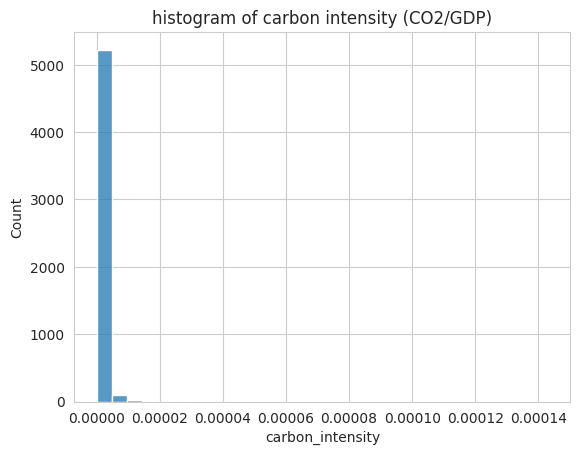

In [ ]:
sns.histplot(x="carbon_intensity", data=df_co2, bins=30)
plt.title("histogram of carbon intensity (CO2/GDP)")
plt.show()

* Data is left skewed. We try square root transformation.

/tmp/ipython-input-4066695816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2['sqrt_carbon_intensity'] = np.sqrt(df_co2['carbon_intensity'])


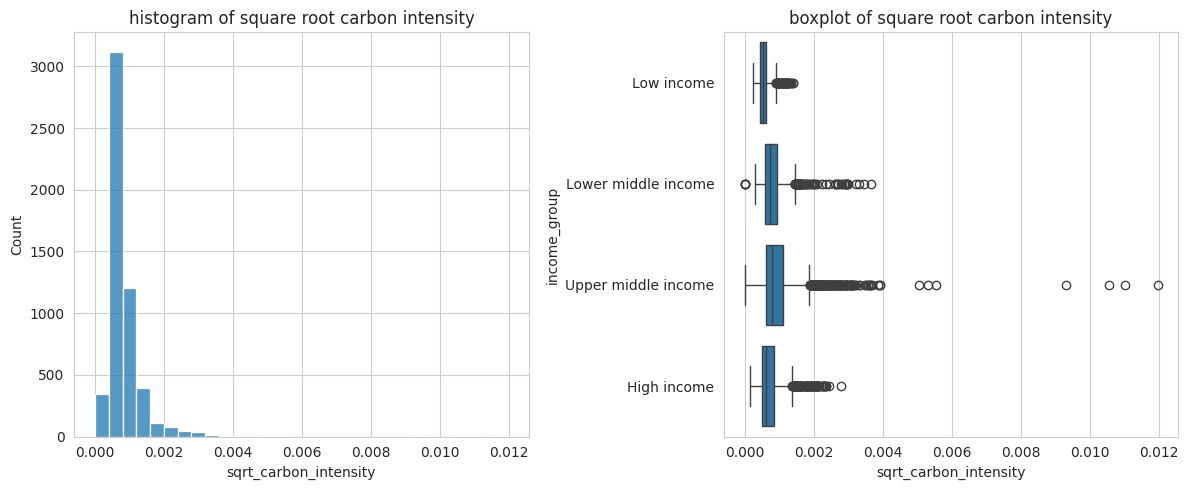

In [ ]:
df_co2['sqrt_carbon_intensity'] = np.sqrt(df_co2['carbon_intensity'])

#checking normal distribution and boxplot of carbon instensity
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x="sqrt_carbon_intensity", data=df_co2, bins=30, ax=axes[0])
axes[0].set_title('histogram of square root carbon intensity')

sns.boxplot(y="income_group", x="sqrt_carbon_intensity", data=df_co2, ax=axes[1])
axes[1].set_title('boxplot of square root carbon intensity')

plt.tight_layout()
plt.show()

* Data is right skewed even after square root transformation. We will try to clean outliers.

In [ ]:
Q1 = df_co2['sqrt_carbon_intensity'].quantile(0.25)
Q3 = df_co2['sqrt_carbon_intensity'].quantile(0.75)
IQR = Q3 - Q1

# setting boundaries (1.5 * IQR )
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter
df_co2_2 = df_co2[
    (df_co2['sqrt_carbon_intensity'] >= lower_bound) &
    (df_co2['sqrt_carbon_intensity'] <= upper_bound)
].copy()


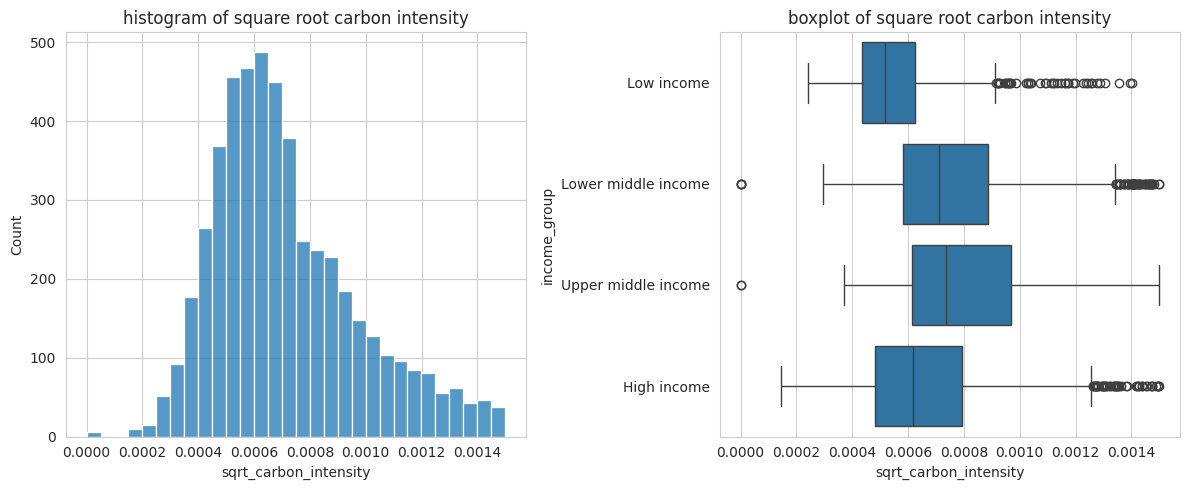

In [ ]:
#checking normal distribution and boxplot of carbon instensity
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x="sqrt_carbon_intensity", data=df_co2_2, bins=30, ax=axes[0])
axes[0].set_title('histogram of square root carbon intensity')

sns.boxplot(y="income_group", x="sqrt_carbon_intensity", data=df_co2_2, ax=axes[1])
axes[1].set_title('boxplot of square root carbon intensity')

plt.tight_layout()
plt.show()

* The distribution is more normalized after we clean outliers. We can run Anova test now.

In [ ]:
formula2 = "sqrt_carbon_intensity ~ C(income_group)" #it is recommended to put the formula in a variable called "formula"
model2 = ols(formula2, data=df_co2_2).fit()

In [ ]:
aov_table2 = anova_lm(model2, typ=2) #use tpy=2 for no interactions
aov_table2

,sum_sq,df,F,PR(>F)
C(income_group),0.000034,3.0,186.506945,1.233504e-114
Residual,0.000305,4995.0,NaN,NaN


* Following the application of a square-root transformation and the removal of outliers via the IQR method to ensure the assumption of normality, a One-Way ANOVA was performed. The results revealed a highly statistically significant difference in the mean environmental efficiency ($\text{Sqrt}(\text{CO}_2/\text{GDP})$) across the four income groups ($F(3, 54995) = 186.51$, $\mathbf{P < 0.001}$). This strong significance rejects the null hypothesis, definitively confirming that the observed differences in mean Carbon Intensity—where the Upper Middle Income group is the most intensive and the High Income group is significantly cleaner—are not due to chance, but represent real structural variations in global economic development.

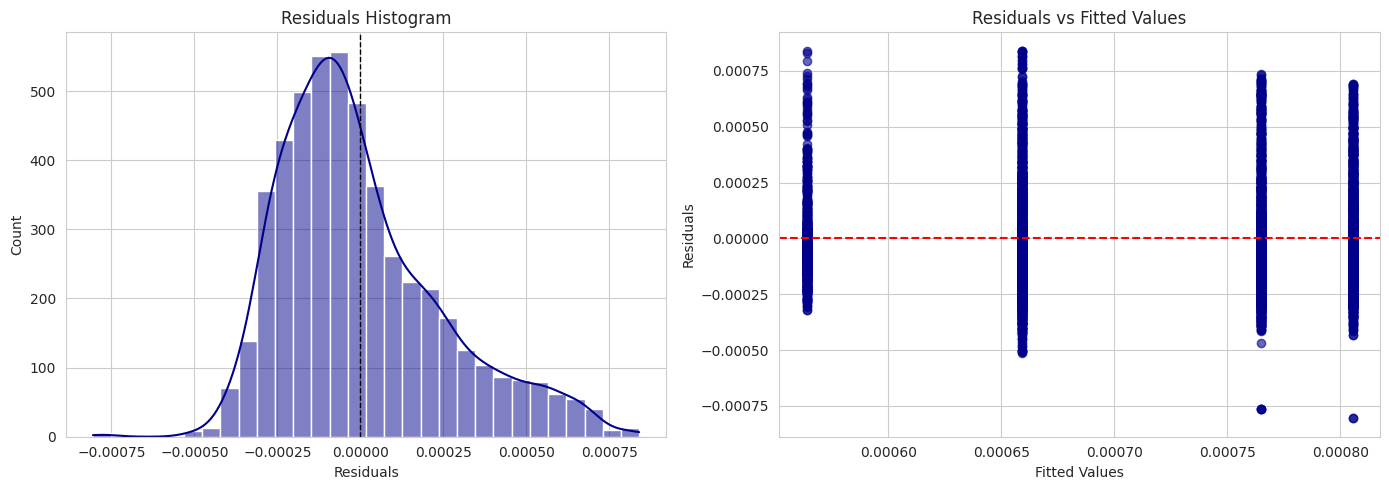

In [ ]:
residuals = model2.resid  #getting the residuals of the anova model

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.set_style("whitegrid")

# Residuals histogram
sns.histplot(model2.resid, bins=30, kde=True, color='darkblue', ax=axes[0])
axes[0].set_title('Residuals Histogram')
axes[0].set_xlabel('Residuals')
axes[0].axvline(model2.resid.mean(), color='black', linestyle='dashed', linewidth=1)

# Residuals vs. fitted values
axes[1].scatter(model2.fittedvalues, model2.resid, alpha=0.6, color='darkblue')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[1].set_xlabel("Fitted Values")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs Fitted Values")

plt.tight_layout()
plt.show()

* The diagnostic plots confirm the model's reliability. The Residuals Histogram shows the errors are roughly normally distributed, and because the sample size is large, the slight observed skewness does not undermine the analysis. Crucially, the Residuals vs Fitted Values plot confirms the error variance is consistent across all income groups. These successful checks validate the highly significant ANOVA finding ($\mathbf{P < 0.001}$), confirming that the differences in environmental efficiency are statistically robust.

In [ ]:
# Extracting the sum of squares values for the model and residuals
SS_model2 = aov_table2['sum_sq'].iloc[:-1].sum()
SS_residual2 = aov_table2['sum_sq'].iloc[-1]
# Total sum of squares
SS_total2 = SS_model2 + SS_residual2

# Explained variance
explained_variance2 = SS_model2 / SS_total2
print(f'Explained Variance: {explained_variance2:.3f}')

Explained Variance: 0.101


* The ANOVA test confirms that Income Group is a statistically significant factor in determining Carbon Intensity ($P < 0.001$). However, the model's Explained Variance ($R^2$) is low at 0.101. This means the income classification successfully shows that differences exist (statistical significance), but it only accounts for 10.1% of the total change in environmental efficiency. The remaining variability must be driven by other factors not included in this model, such as national energy policies or industrial structure.

In [ ]:
tukey2 = pairwise_tukeyhsd(endog=df_co2_2['sqrt_carbon_intensity'], groups=df_co2_2['income_group'], alpha=0.05)
print(tukey2)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
        High income          Low income  -0.0001    0.0 -0.0001 -0.0001   True
        High income Lower middle income   0.0001    0.0  0.0001  0.0001   True
        High income Upper middle income   0.0001    0.0  0.0001  0.0002   True
         Low income Lower middle income   0.0002    0.0  0.0002  0.0002   True
         Low income Upper middle income   0.0002    0.0  0.0002  0.0003   True
Lower middle income Upper middle income      0.0 0.0001     0.0  0.0001   True
------------------------------------------------------------------------------


* The Tukey HSD test confirmed that the differences in mean $\mathbf{\text{Sqrt}(\text{Carbon Intensity})}$ are statistically significant ($\mathbf{p < 0.05}$ for all pairs) between every income group pair. This analysis definitively validates the structural ranking of environmental efficiency, proving that the economic development phase is a genuine driver of relative pollution. Crucially, the test confirms that the Upper middle income group is statistically more carbon-intensive than the High income group ($\text{meandiff} = 0.0001, \mathbf{p=0.0}$), providing robust evidence that the peak environmental burden occurs precisely during the rapid industrialization stage.

**GDP by Region**

In [ ]:
df_gdp = df.dropna(subset=['gdp_current_us', 'region'])

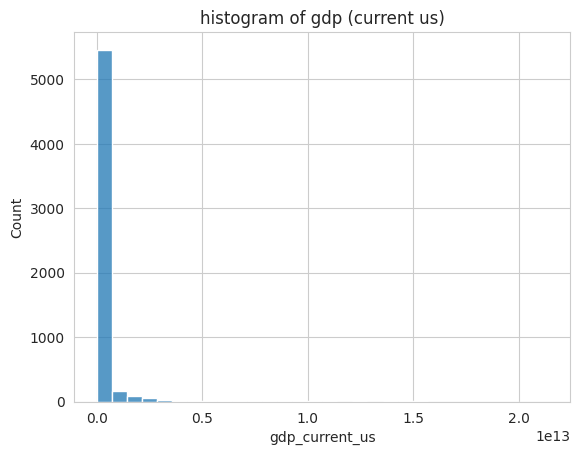

In [ ]:
sns.histplot(x="gdp_current_us", data=df_gdp, bins=30)
plt.title("histogram of gdp (current us)")
plt.show()

* Data is left skewed. We will do log-transformation.

/tmp/ipython-input-3706689968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp["log_gdp"] = np.log(df_gdp["gdp_current_us"]+1)


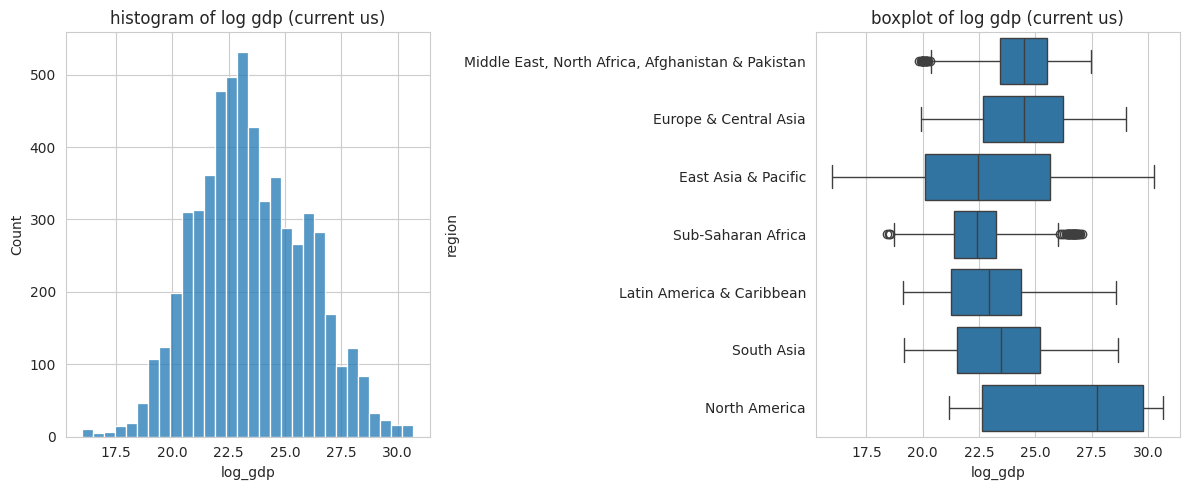

In [ ]:
df_gdp["log_gdp"] = np.log(df_gdp["gdp_current_us"]+1)

#checking normal distribution and boxplot of carbon instensity
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x="log_gdp", data=df_gdp, bins=30, ax=axes[0])
axes[0].set_title('histogram of log gdp (current us)')

sns.boxplot(y="region", x="log_gdp", data=df_gdp, ax=axes[1])
axes[1].set_title('boxplot of log gdp (current us)')

plt.tight_layout()
plt.show()

* Data is normalized after log-transformation.

In [ ]:
formula3 = "log_gdp ~ C(region)" #it is recommended to put the formula in a variable called "formula"
model3 = ols(formula3, data=df_gdp).fit()

In [ ]:
aov_table3 = anova_lm(model3, typ=2) #use tpy=2 for no interactions
aov_table3

,sum_sq,df,F,PR(>F)
C(region),5118.571504,6.0,169.482345,2.571617e-199
Residual,29390.808633,5839.0,NaN,NaN


* The ANOVA test confirms that Region is a highly statistically significant factor in determining a country's economic status, measured by $\text{Log}(\text{GDP})$. With a negligible $\mathbf{P\text{-value} \ (PR(>F) \approx 0.0)}$ and an extremely high $\mathbf{F\text{-statistic} \ (169.48)}$, the null hypothesis is strongly rejected. This result definitively proves that the average $\text{Log}(\text{GDP})$ varies significantly across the 7 regions, confirming that geography and regional economic structure are critical determinants of a country's wealth. The high F-statistic indicates that the variation explained by the regions ($\mathbf{sum\_sq} = 5118.57$) is substantially larger than the unexplained error.

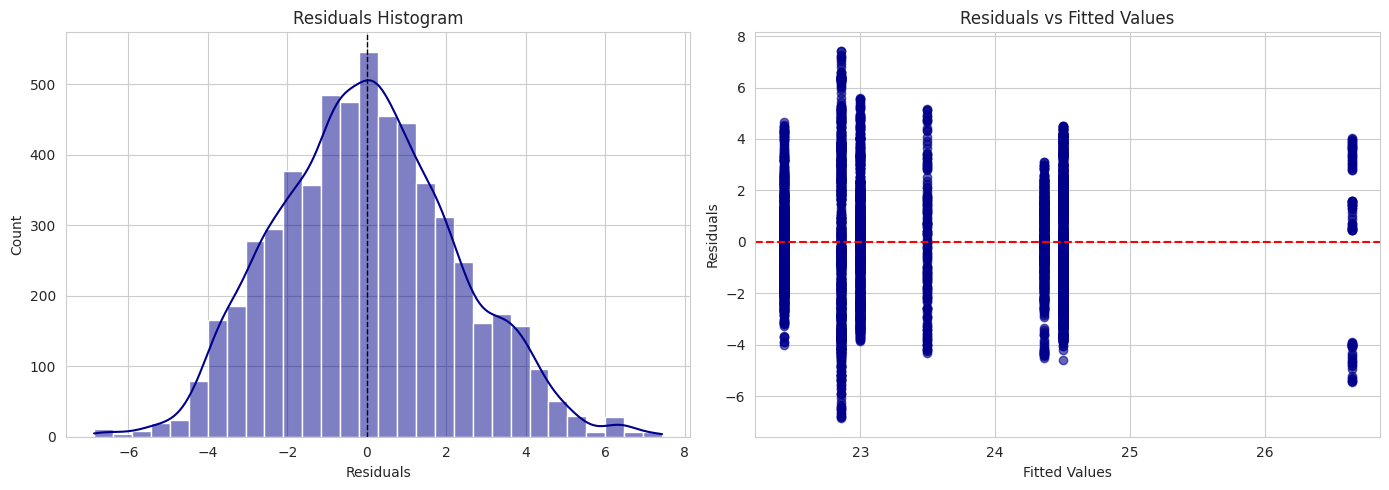

In [ ]:
residuals = model3.resid  #getting the residuals of the anova model

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.set_style("whitegrid")

# Residuals histogram
sns.histplot(model3.resid, bins=30, kde=True, color='darkblue', ax=axes[0])
axes[0].set_title('Residuals Histogram')
axes[0].set_xlabel('Residuals')
axes[0].axvline(model3.resid.mean(), color='black', linestyle='dashed', linewidth=1)

# Residuals vs. fitted values
axes[1].scatter(model3.fittedvalues, model3.resid, alpha=0.6, color='darkblue')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[1].set_xlabel("Fitted Values")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs Fitted Values")

plt.tight_layout()
plt.show()

The diagnostic plots confirm the model's reliability for the ANOVA test. The Residuals Histogram shows the errors are roughly normally distributed, which is good. Although the Residuals vs Fitted Values plot suggests a slight violation of the homoskedasticity (unequal error spread) across the seven regional clusters, this is overcome by the large sample size. Because the test is robust, the finding that regions significantly affect $\text{Log}(\text{GDP})$ ($\mathbf{P < 0.001}$) remains highly reliable and valid.

In [ ]:
tukey3 = pairwise_tukeyhsd(endog=df_gdp['log_gdp'], groups=df_gdp['region'], alpha=0.05)
print(tukey3)

                                           Multiple Comparison of Means - Tukey HSD, FWER=0.05                                            
                      group1                                            group2                      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------------------------------------
                              East Asia & Pacific                             Europe & Central Asia   1.6432    0.0  1.3743   1.912   True
                              East Asia & Pacific                         Latin America & Caribbean   0.1379 0.8119 -0.1565  0.4323  False
                              East Asia & Pacific Middle East, North Africa, Afghanistan & Pakistan   1.5015    0.0  1.1686  1.8344   True
                              East Asia & Pacific                                     North America   3.7841    0.0   3.055  4.5132   True
                           

* The Tukey HSD test confirmed that regional classification is a fundamental and statistically distinct determinant of national wealth, as 18 out of 21 regional comparisons showed a statistically significant difference ($\mathbf{P < 0.05}$). The analysis highlighted profound economic disparities, most notably that $\text{Log}(\text{GDP})$ in North America is significantly higher than in every other region, while the difference between East Asia & Pacific and Latin America & Caribbean was found to be statistically insignificant ($\mathbf{P=0.8119}$), suggesting their average wealth levels are comparable.

Ideas:
*   Life Expectancy at Birth by Income Group
*   renewvable_energy_consumption by income group
*   individuals_using_internet by region
*   population & rural population by income group

<class 'pandas.core.frame.DataFrame'>
Index: 6300 entries, 30 to 17236
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   country                        6300 non-null   object  
 1   date                           6300 non-null   object  
 2   agricultural_land              5965 non-null   float64 
 3   access_to_electricity          5475 non-null   float64 
 4   renewvable_energy_consumption  6065 non-null   float64 
 5   co2_emisions                   5549 non-null   float64 
 6   other_greenhouse_emisions      5549 non-null   float64 
 7   population_density             6073 non-null   float64 
 8   inflation_annual               4972 non-null   float64 
 9   individuals_using_internet     5747 non-null   float64 
 10  gdp_current_us                 5846 non-null   float64 
 11  birth_rate                     6168 non-null   float64 
 12  death_rate                     6153 n